In [42]:
"""
Visualize:
    * nand uncon before nand con cnt / nand con cnt
    * not uncon before not con cnt / not con cnt
    * any uncon before con cnt / con cnt 
    * nand_subopt_plastic_before_nand_opt_plastic_cnt / nand_opt_plastic_cnt
    * not_subopt_plastic_before_not_opt_plastic_cnt / not_opt_plastic_cnt
    * any_subopt_plastic_before_opt_plastic_cnt / any_opt_plastic_cnt  
"""

%matplotlib inline
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Load settings
settings_fpath = "../params/settings.json"
settings= None
with open(settings_fpath) as fp:
    settings = json.load(fp)
    
# Data file path
data_fpath = "/Users/amlalejini/Desktop/scratch/oopf16/processed/lineage_stepping_stones_overview__2016-12-14.csv"

df = pd.read_csv(data_fpath)

#### Some manual settings
env_order = [u'ntasks_1__envs_1__tasks_NAND',
             u'ntasks_1__envs_1__tasks_NOT',
             u'ntasks_2__envs_1__tasks_NAND_NOT',
             u'ntasks_1__envs_2__tasks_NAND',
             u'ntasks_1__envs_2__tasks_NOT',
             u'ntasks_2__envs_2__tasks_NAND_NOT',
             u'ntasks_2__envs_4__tasks_NAND_NOT',
             u'ntasks_2__envs_4__tasks_NOT_NAND',
             u'ntasks_2__envs_4__tasks_NAND_NOT__style_2',
             u'ntasks_2__envs_4__tasks_NOT_NAND__style_2']


In [3]:
##########################
# Helper functions
##########################
def GetTreatmentAttr(treatment, attr):
    """
    Given a treatment name and an attribute, what are its attributes?
    """
    attrs = {attr.split("_")[0]:attr.split("_")[1:] for attr in treatment.split("__")}
    return attrs[attr]

def GetTreatmentEnvType(treatment):
    return settings["treatments"][treatment]["settings"]

##########################
# Data Organization
##########################
# Make a list of treatments by change rate. 
all_treatments = set([])
treatments_by_change_rate = {}
treatments_by_env = {}
change_rates = set([])
for treatment in df['treatment']:
    all_treatments.add(treatment)
    # First, get change rate for this treatment.
    change_rate = int(GetTreatmentAttr(treatment, "cr")[0])
    change_rates.add(change_rate)
    if not change_rate in treatments_by_change_rate:
        treatments_by_change_rate[change_rate] = set()
    treatments_by_change_rate[change_rate].add(treatment)
    # Next, sort by environment type. 
    env = GetTreatmentEnvType(treatment)
    if not env in treatments_by_env:
        treatments_by_env[env] = set()
    treatments_by_env[env].add(treatment)

# Sort treatments_by_env by change rate.
for env in treatments_by_env:
    treatments_by_env[env] = list(treatments_by_env[env])
    treatments_by_env[env].sort(key = lambda treatment: int(GetTreatmentAttr(treatment, "cr")[0]))

    

In [44]:
##########################
# By environment type, plot:
#  * nand uncon before nand con / nand con count
##########################
stepping_stones_csv = ",".join(["treatment","environment","change_rate","trait", "total_reps",
                         "uncon_before_con_cnt","con_cnt","uncon_before_con_prct",
                         "subopt_plastic_before_opt_plastic_cnt","opt_plastic_cnt","subopt_plastic_before_opt_plastic_prct"]) + "\n"

for env in env_order:
    treatments = treatments_by_env[env]
    for treatment in treatments:
        cr = GetTreatmentAttr(treatment, "cr")[0]
        total_reps = df[df.treatment == treatment]["total_reps"].iloc[0]
        nand_line = "%s,%s,%s,%s,%s," % (treatment, env, cr, "nand", str(total_reps))
        not_line = "%s,%s,%s,%s,%s," % (treatment, env, cr, "not", str(total_reps))
        all_line = "%s,%s,%s,%s,%s," % (treatment, env, cr, "all", str(total_reps))
        
        print "Treatment: %s" % treatment
        
        num = df[df.treatment == treatment]["nand_uncon_before_nand_con_cnt"].iloc[0]
        den = df[df.treatment == treatment]["nand_con_cnt"].iloc[0]
        frac = 0
        if den != 0: frac = float(num) / float(den)
        print "  nand uncon before con/nand con: %d/%d (%f)" % (num, den, frac)
        print "  p(conditional nand expression) = " + str(float(den) / float(total_reps))
        #print "  p(unconditional nand expression) = " + str(float())
        nand_line += "%d,%d,%f," % (num, den, frac)
        
        num = df[df.treatment == treatment]["not_uncon_before_not_con_cnt"].iloc[0]
        den = df[df.treatment == treatment]["not_con_cnt"].iloc[0]
        frac = 0
        if den != 0: frac = float(num) / float(den)
        print "  not uncon before con/not con: %d/%d (%f)" % (num, den, frac)
        not_line += "%d,%d,%f," % (num, den, frac)
        
        num = df[df.treatment == treatment]["any_uncon_before_con_cnt"].iloc[0]
        den = df[df.treatment == treatment]["con_cnt"].iloc[0]
        frac = 0
        if den != 0: frac = float(num) / float(den)
        print "  any uncon before con/any con: %d/%d (%f)" % (num, den, frac)
        all_line += "%d,%d,%f," % (num, den, frac)
        
        num = df[df.treatment == treatment]["nand_subopt_plastic_before_nand_opt_plastic_cnt"].iloc[0]
        den = df[df.treatment == treatment]["nand_opt_plastic_cnt"].iloc[0]
        frac = 0
        if den != 0: frac = float(num) / float(den)
        print "  nand subopt plast before opt plast/nand opt plast: %d/%d (%f)" % (num, den, frac)
        nand_line += "%d,%d,%f\n" % (num, den, frac)
        
        num = df[df.treatment == treatment]["not_subopt_plastic_before_not_opt_plastic_cnt"].iloc[0]
        den = df[df.treatment == treatment]["not_opt_plastic_cnt"].iloc[0]
        frac = 0
        if den != 0: frac = float(num) / float(den)
        print "  not subopt plast before opt plast/not opt plast: %d/%d (%f)" % (num, den, frac)
        not_line += "%d,%d,%f\n" % (num, den, frac)
        
        num = df[df.treatment == treatment]["any_subopt_plastic_before_opt_plastic_cnt"].iloc[0]
        den = df[df.treatment == treatment]["any_opt_plastic_cnt"].iloc[0]
        frac = 0
        if den != 0: frac = float(num) / float(den)
        print "  any subopt plast before opt plast/any opt plast: %d/%d (%f)" % (num, den, frac)
        all_line += "%d,%d,%f\n" % (num, den, frac)
        
        stepping_stones_csv += nand_line + not_line + all_line
        

with open("../../web/stepping_stones_data_transformed.csv", "w") as fp:
    fp.write(stepping_stones_csv.strip("\n"))

df_trans = pd.read_csv("../../web/stepping_stones_data_transformed.csv")

Treatment: ntasks_1__envs_1__cr_0__tasks_NAND__mr_p0075
  nand uncon before con/nand con: 0/0 (0.000000)
  p(conditional nand expression) = 0.0
  not uncon before con/not con: 0/0 (0.000000)
  any uncon before con/any con: 0/0 (0.000000)
  nand subopt plast before opt plast/nand opt plast: 0/0 (0.000000)
  not subopt plast before opt plast/not opt plast: 0/0 (0.000000)
  any subopt plast before opt plast/any opt plast: 0/0 (0.000000)
Treatment: ntasks_1__envs_1__cr_0__tasks_NOT__mr_p0075
  nand uncon before con/nand con: 0/0 (0.000000)
  p(conditional nand expression) = 0.0
  not uncon before con/not con: 0/0 (0.000000)
  any uncon before con/any con: 0/0 (0.000000)
  nand subopt plast before opt plast/nand opt plast: 0/0 (0.000000)
  not subopt plast before opt plast/not opt plast: 0/0 (0.000000)
  any subopt plast before opt plast/any opt plast: 0/0 (0.000000)
Treatment: ntasks_2__envs_1__cr_0__tasks_NAND_NOT__mr_p0075
  nand uncon before con/nand con: 0/0 (0.000000)
  p(conditional 

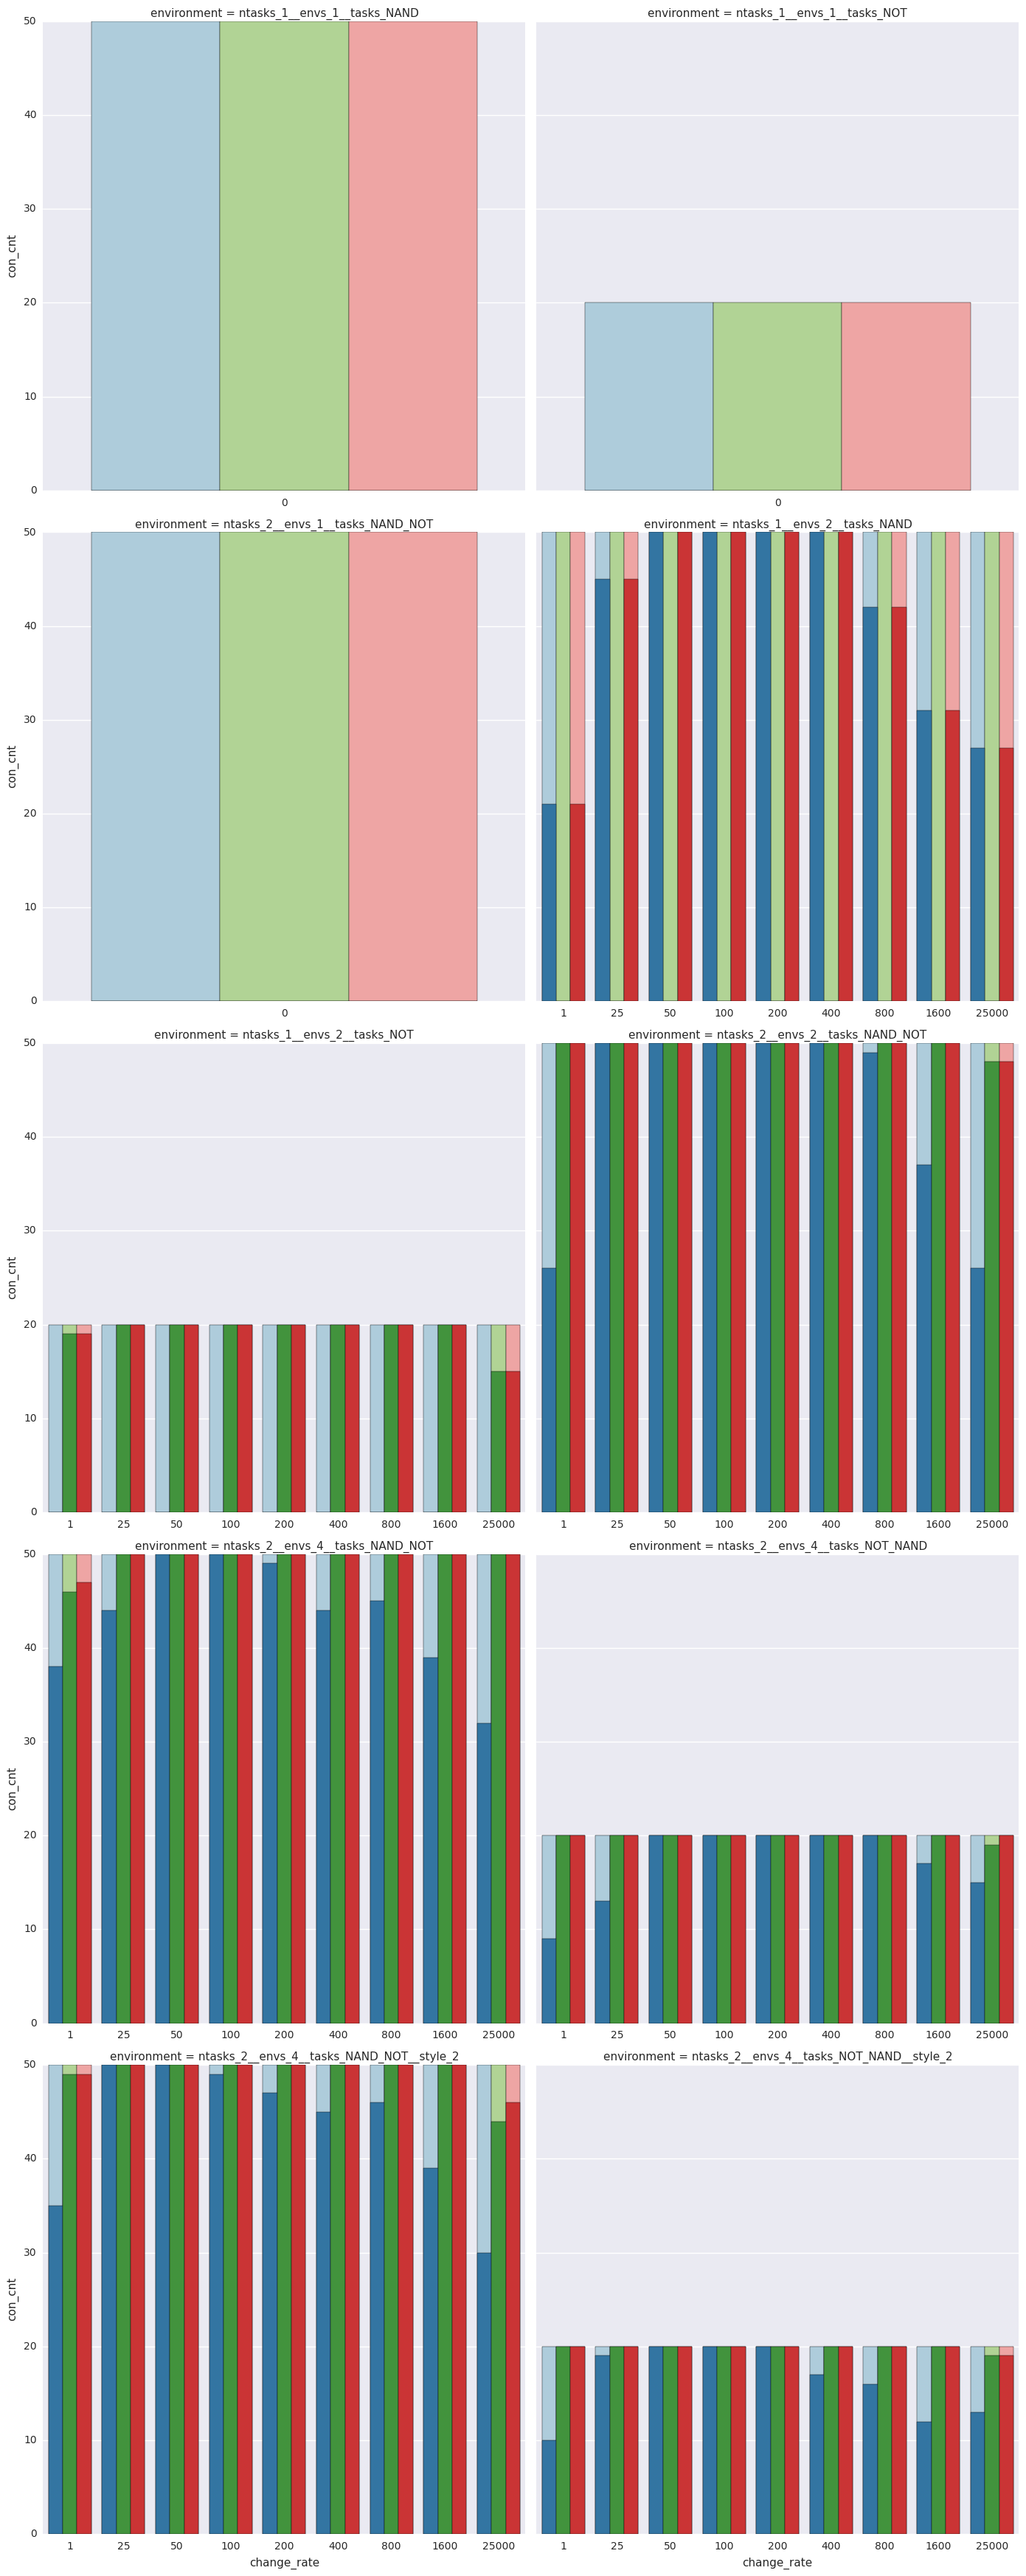

In [51]:
#############################################
# Conditional expression cnt / Total Rep cnt
#############################################
back_colors = sns.color_palette("Paired", 6)[::2]
front_colors = sns.color_palette("Paired", 6)[1::2]

g = sns.FacetGrid(data = df_trans, col="environment", col_order=env_order, col_wrap=2, sharex=False,  size = 7)
g = (g.map(sns.barplot, "change_rate", "total_reps", "trait", ci=None, hue_order=["nand","not","all"], palette={"nand":back_colors[0], "not":back_colors[1], "all":back_colors[2]})
         .set(ylim=(0, 50)))
g = (g.map(sns.barplot, "change_rate", "con_cnt", "trait", ci=None, hue_order=["nand","not","all"], palette={"nand":front_colors[0], "not":front_colors[1], "all":front_colors[2]})
         .set(ylim=(0, 50)))

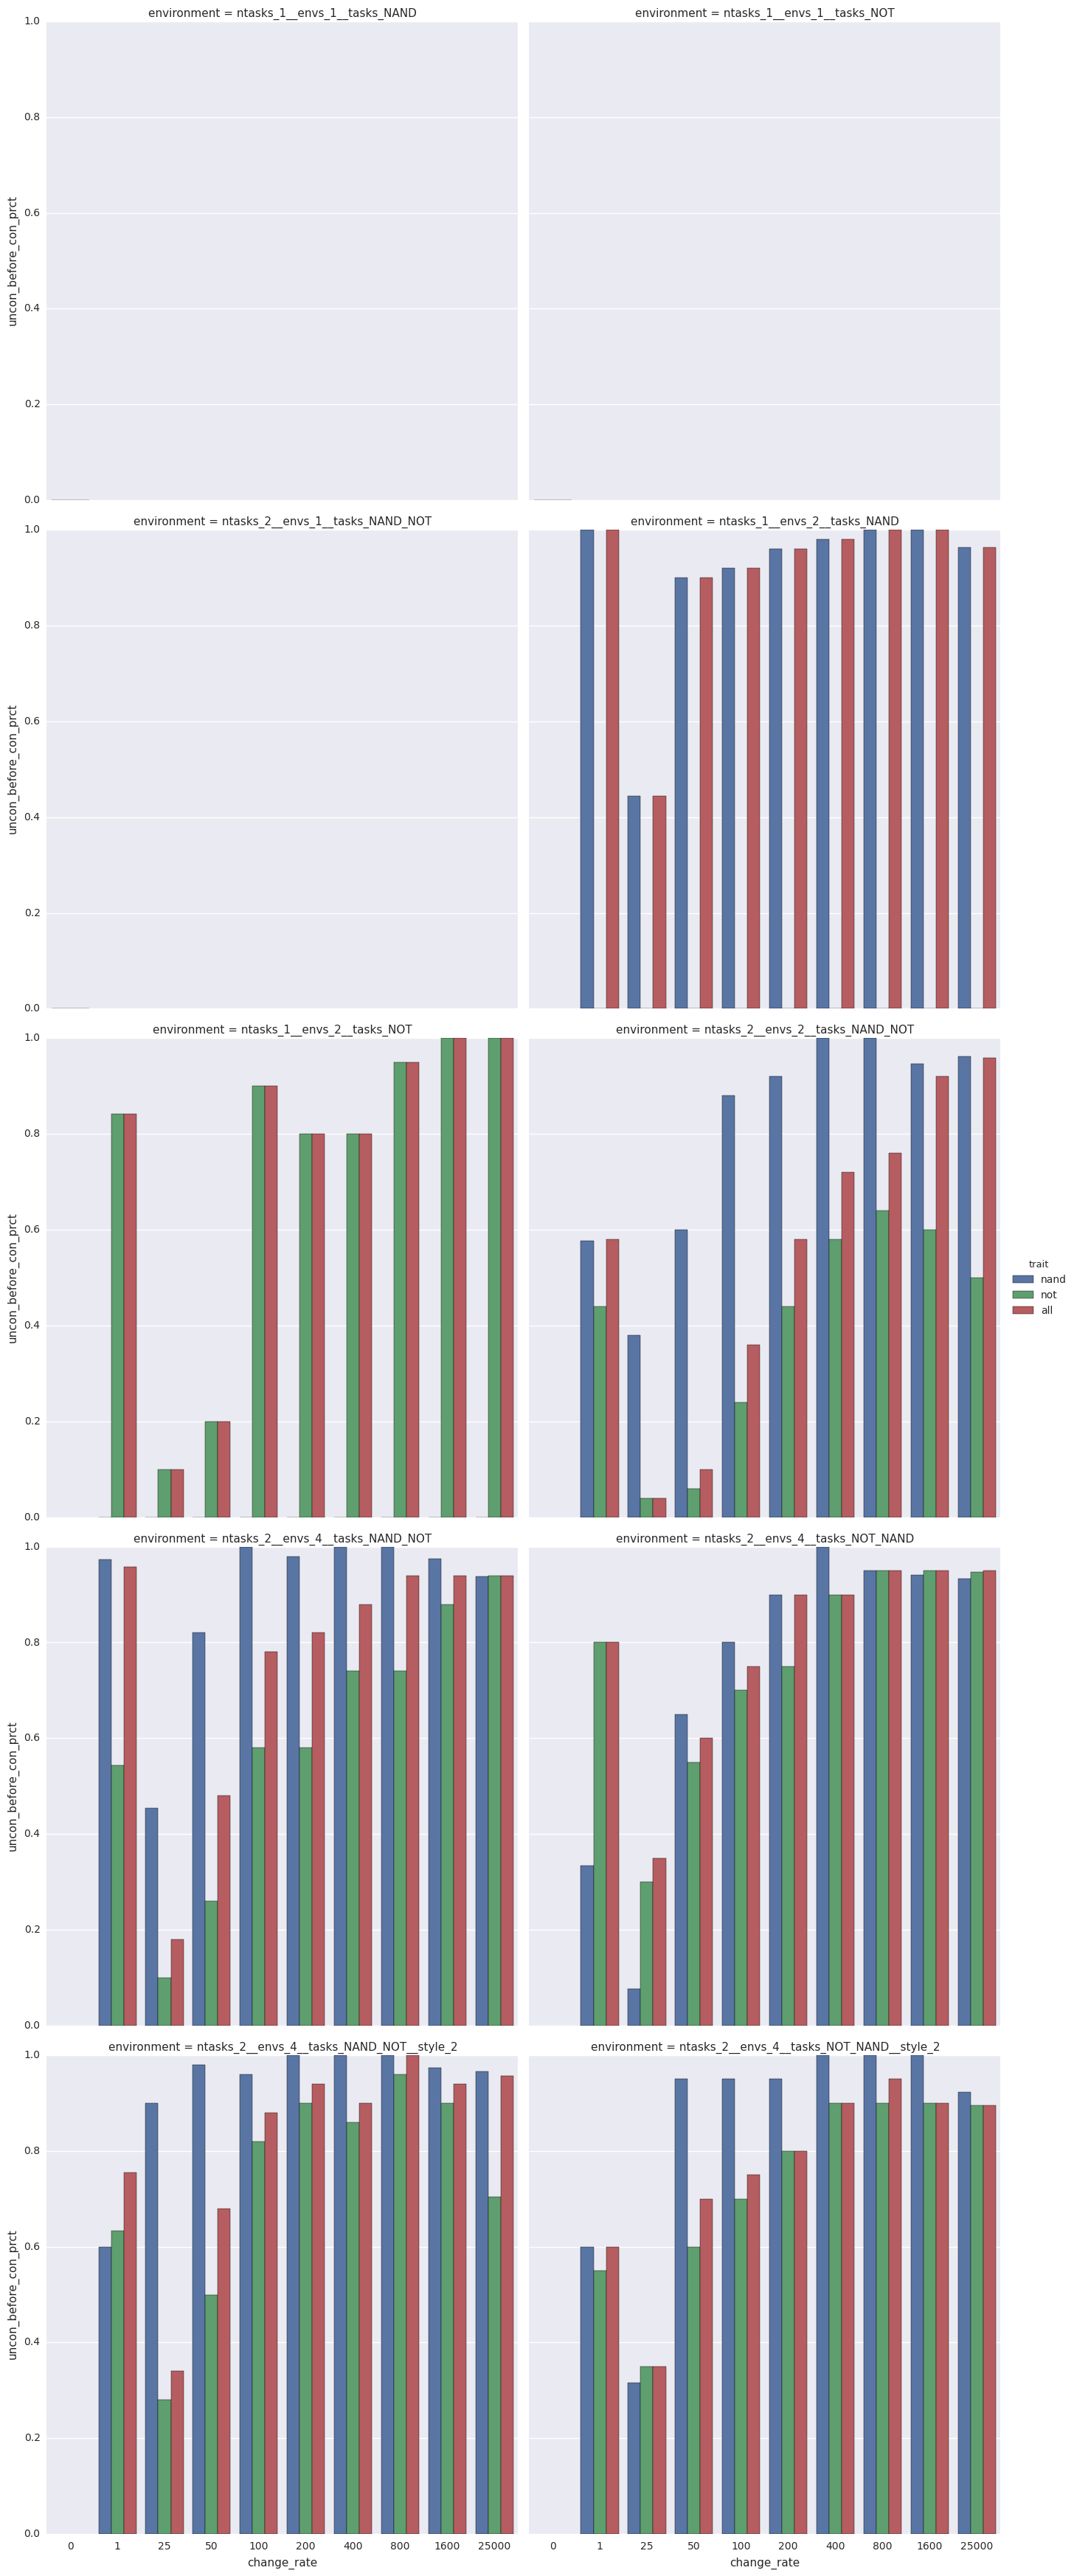

In [49]:
#############################################
# Unconditional before conditional? 
#  - Visualizations
#############################################
###############
# Just percentages
###############
g = sns.factorplot(x="change_rate", y="uncon_before_con_prct", hue="trait", col="environment", col_wrap=2, data=df_trans, kind="bar", size = 7, legend=True)
g.set(ylim=(0,1.0))
g.savefig("unconbeforecon.png")


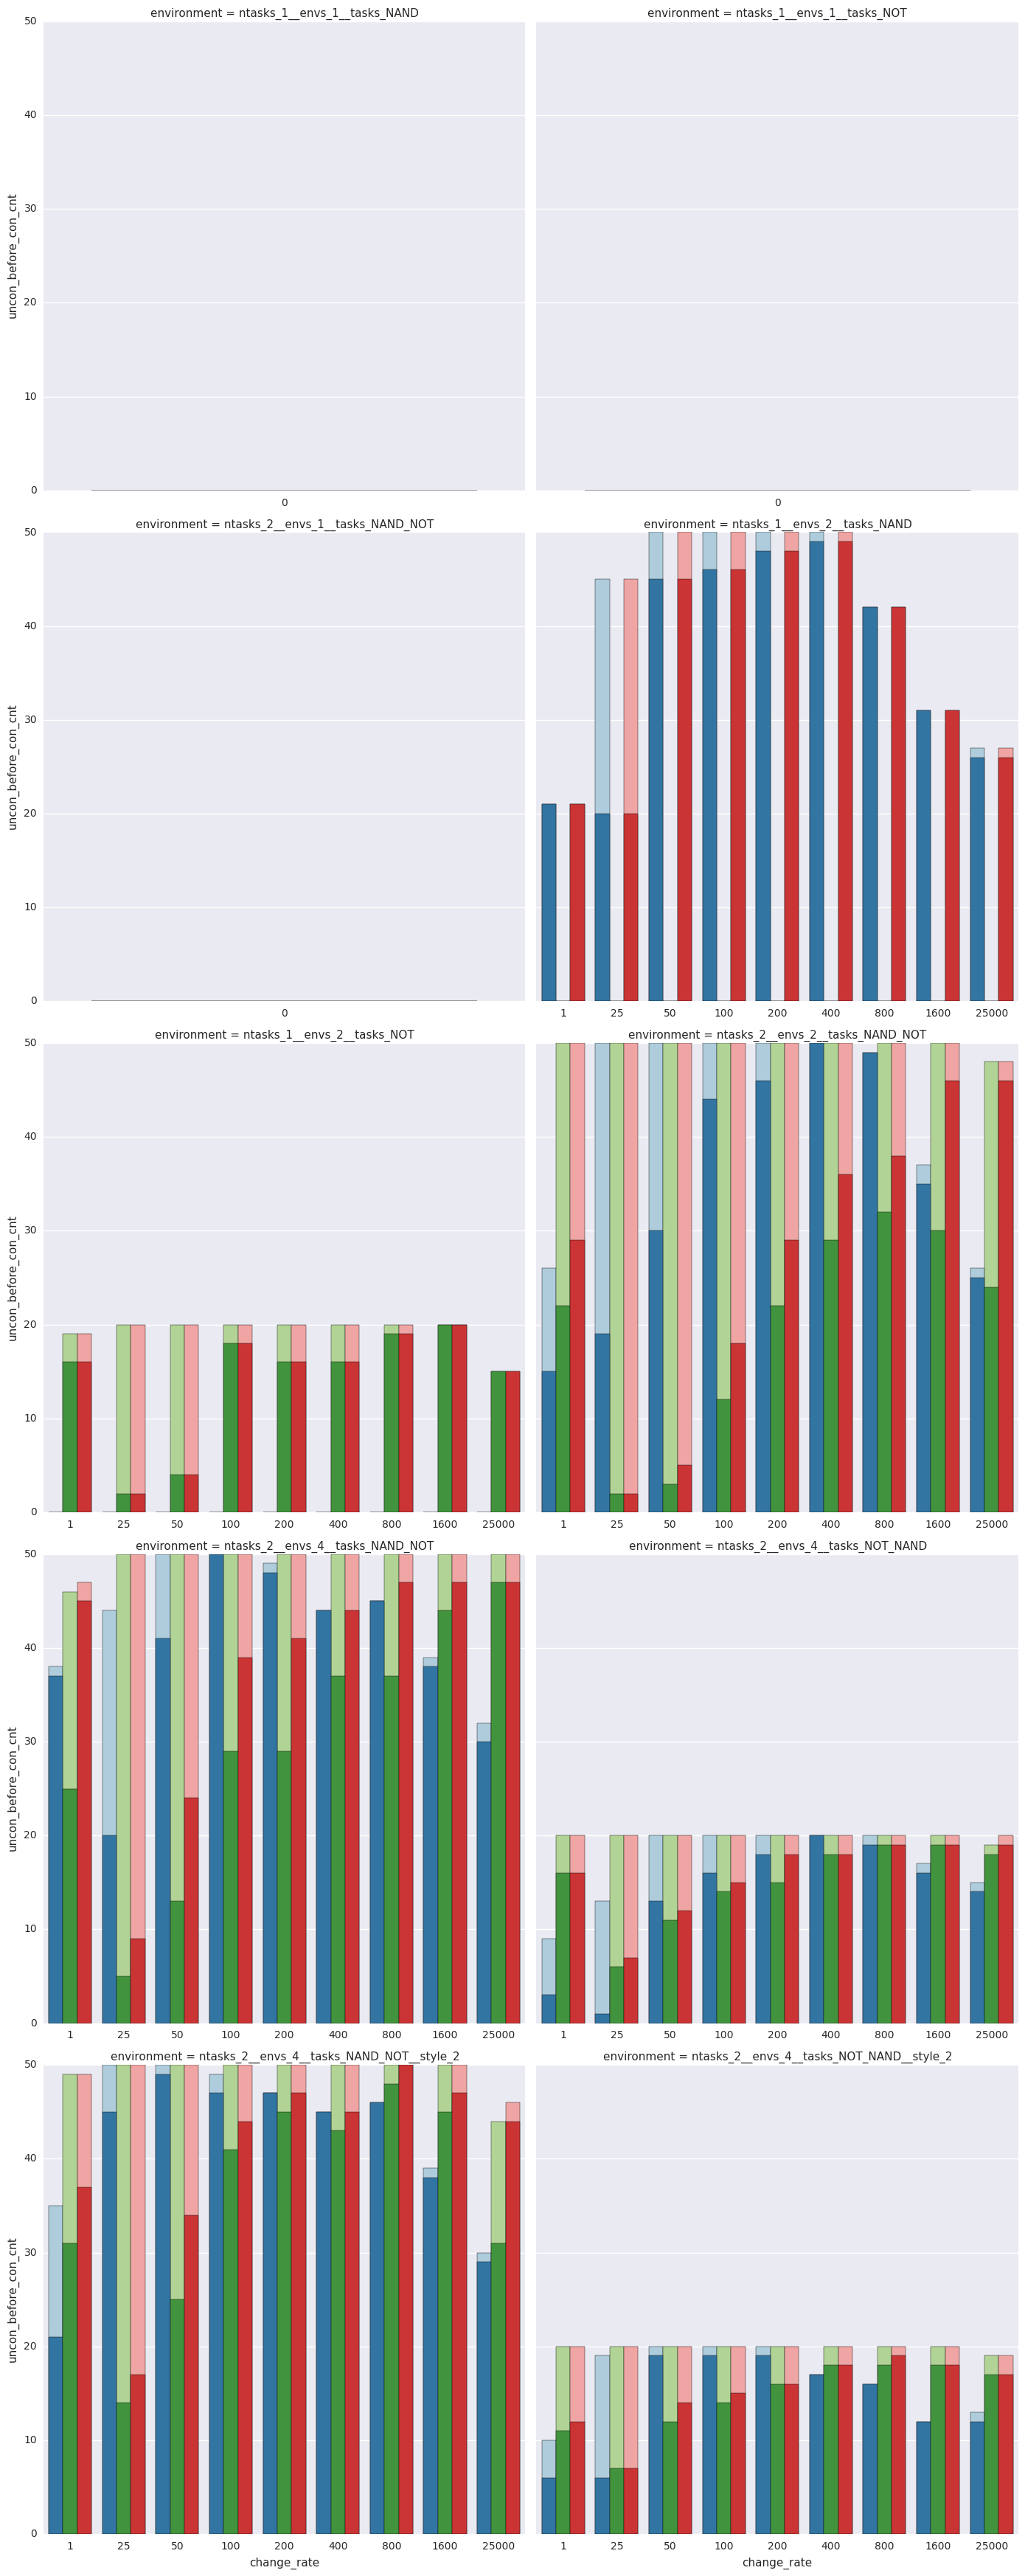

In [47]:
###############
# unconditional before conditional cnt / total conditional cnt
###############
back_colors = sns.color_palette("Paired", 6)[::2]
front_colors = sns.color_palette("Paired", 6)[1::2]

g1 = sns.FacetGrid(data = df_trans, col="environment", col_order=env_order, col_wrap=2, sharex=False,  size = 7)
g1 = (g1.map(sns.barplot, "change_rate", "con_cnt", "trait", ci=None, hue_order=["nand","not","all"], palette={"nand":back_colors[0], "not":back_colors[1], "all":back_colors[2]})
         .set(ylim=(0, 50)))
g1 = (g1.map(sns.barplot, "change_rate", "uncon_before_con_cnt", "trait", ci=None, hue_order=["nand","not","all"], palette={"nand":front_colors[0], "not":front_colors[1], "all":front_colors[2]})
         .set(ylim=(0, 50)))


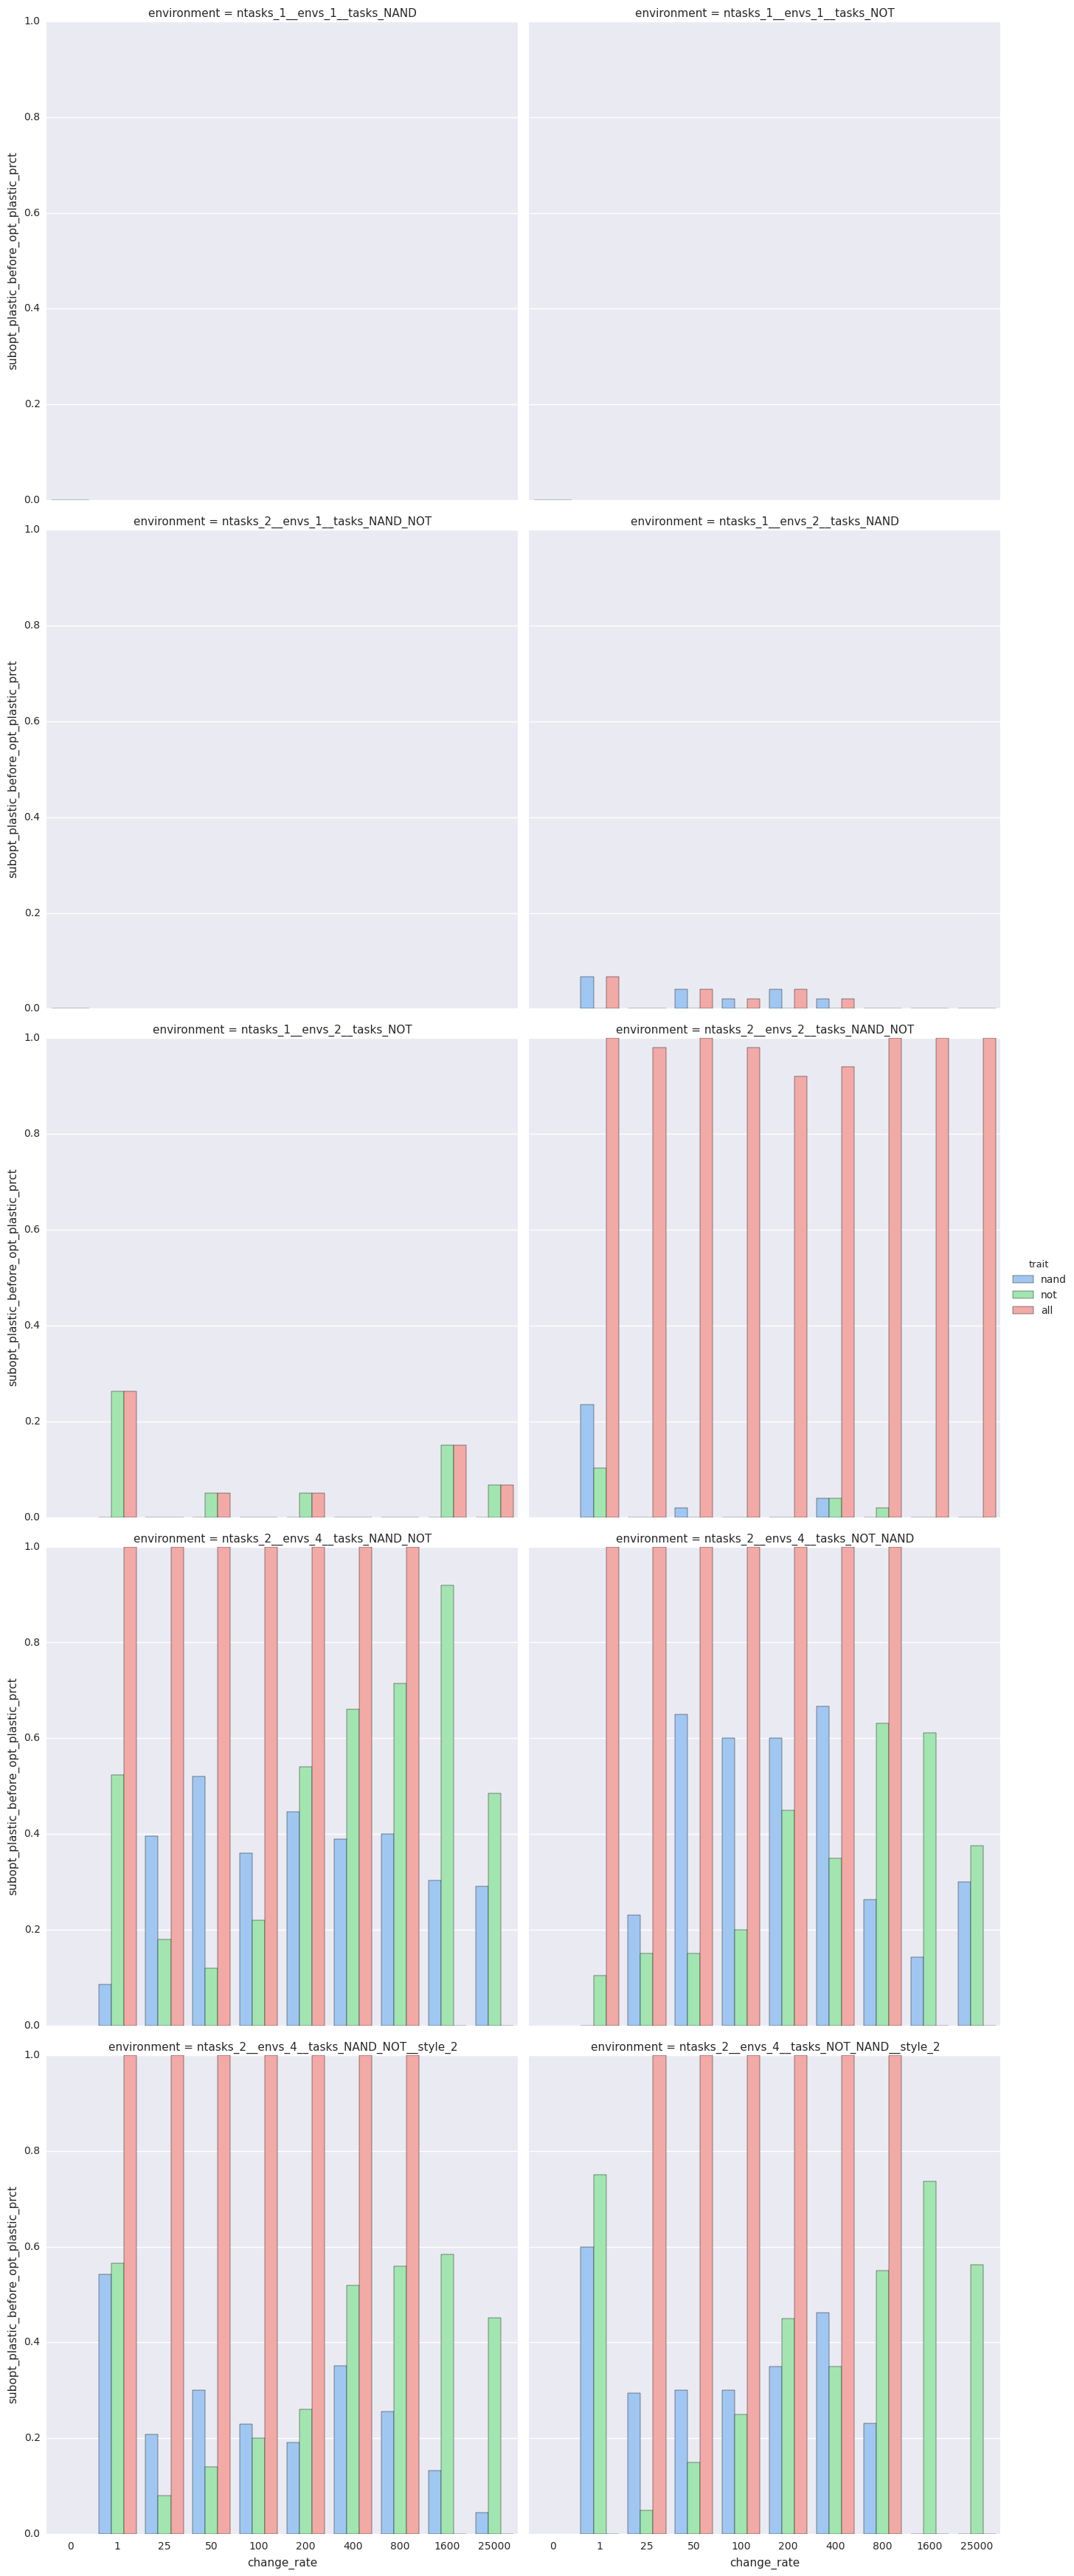

In [48]:
############################################################
# Sub-optimal plasticity before optimal plasticity?
#  - Visualizations
############################################################
g = sns.factorplot(x="change_rate", y="subopt_plastic_before_opt_plastic_prct", hue="trait", col="environment", col_wrap=2, data=df_trans, kind="bar", size = 7, legend=True, palette="pastel")
g.set(ylim=(0,1.0))
g.savefig("subopt_before_opt.png")

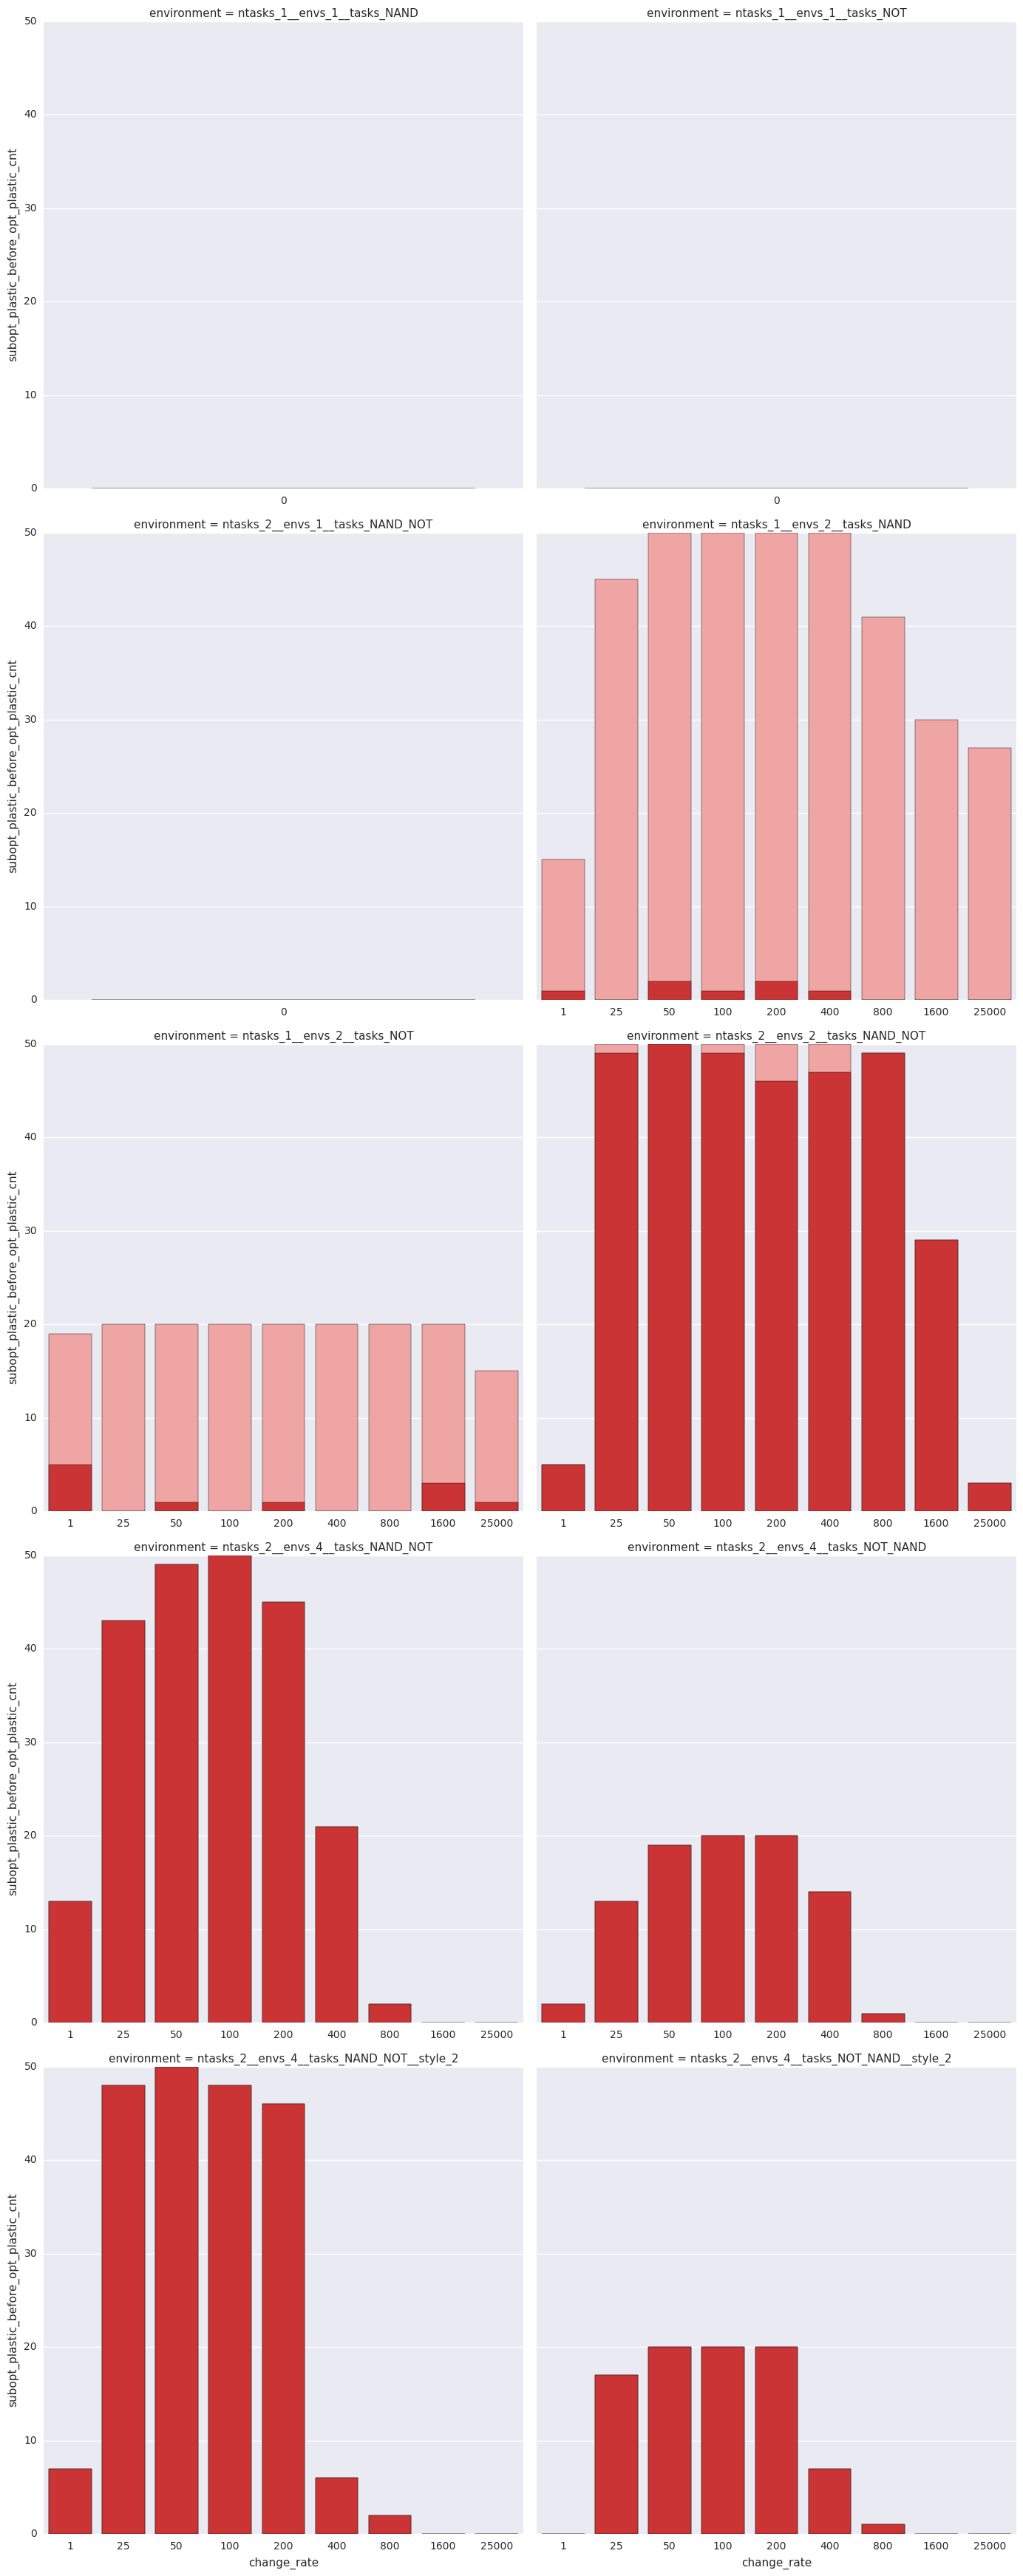

In [35]:
###############
# suboptimal plasticity before optimal plasticity cnt / optimal plasticity cnt
###############
# Visualization: Totals + stepping stones (raw cnts)
g1 = sns.FacetGrid(data = df_trans, col="environment", col_order=env_order, col_wrap=2, sharex=False,  size = 7)
g1 = (g1.map(sns.barplot, "change_rate", "opt_plastic_cnt", "trait", ci=None, hue_order=["all"], palette={"nand":back_colors[0], "not":back_colors[1], "all":back_colors[2]})
         .set(ylim=(0, 50)))
g1 = (g1.map(sns.barplot, "change_rate", "subopt_plastic_before_opt_plastic_cnt", "trait", ci=None, hue_order=["all"], palette={"nand":front_colors[0], "not":front_colors[1], "all":front_colors[2]})
         .set(ylim=(0, 50)))

In [58]:
## Playing with color palettes
trips_palette = ['#deebf7','#9ecae1','#3182bd', '#e5f5f9','#99d8c9','#2ca25f', '#fee0d2','#fc9272','#de2d26']
light = trips_palette[::3]
mid = trips_palette[1::3]
dark = trips_palette[2::3]
# sns.palplot(light)
# sns.palplot(mid)
# sns.palplot(dark)

,treatment,environment,change_rate,trait,total_reps,uncon_before_con_cnt,con_cnt,uncon_before_con_prct,subopt_plastic_before_opt_plastic_cnt,opt_plastic_cnt,subopt_plastic_before_opt_plastic_prct
0,ntasks_1__envs_1__cr_0__tasks_NAND__mr_p0075,ntasks_1__envs_1__tasks_NAND,0,nand,50,0,0,0.000000,0,0,0.000000
1,ntasks_1__envs_1__cr_0__tasks_NAND__mr_p0075,ntasks_1__envs_1__tasks_NAND,0,not,50,0,0,0.000000,0,0,0.000000
2,ntasks_1__envs_1__cr_0__tasks_NAND__mr_p0075,ntasks_1__envs_1__tasks_NAND,0,all,50,0,0,0.000000,0,0,0.000000
3,ntasks_1__envs_1__cr_0__tasks_NOT__mr_p0075,ntasks_1__envs_1__tasks_NOT,0,nand,20,0,0,0.000000,0,0,0.000000
4,ntasks_1__envs_1__cr_0__tasks_NOT__mr_p0075,ntasks_1__envs_1__tasks_NOT,0,not,20,0,0,0.000000,0,0,0.000000
5,ntasks_1__envs_1__cr_0__tasks_NOT__mr_p0075,ntasks_1__envs_1__tasks_NOT,0,all,20,0,0,0.000000,0,0,0.000000
6,ntasks_2__envs_1__cr_0__tasks_NAND_NOT__mr_p0075,ntasks_2__envs_1__tasks_NAND_NOT,0,nand,50,0,0,0.000000,0,0,0.000000
7,ntasks_2__envs_1__cr_0__tasks_NAND_NOT__mr_p0075,ntasks_2__envs_1__tasks_NAND_NOT,0,not,50,0,0,0.000000,0,0,0.000000
8,ntasks_2__envs_1__cr_0__tasks_NAND_NOT__mr_p0075,ntasks_2__envs_1__tasks_NAND_NOT,0,all,50,0,0,0.000000,0,0,0.000000
9,ntasks_1__envs_2__cr_1__tasks_NAND__mr_p0075,ntasks_1__envs_2__tasks_NAND,1,nand,50,21,21,1.000000,1,15,0.066667


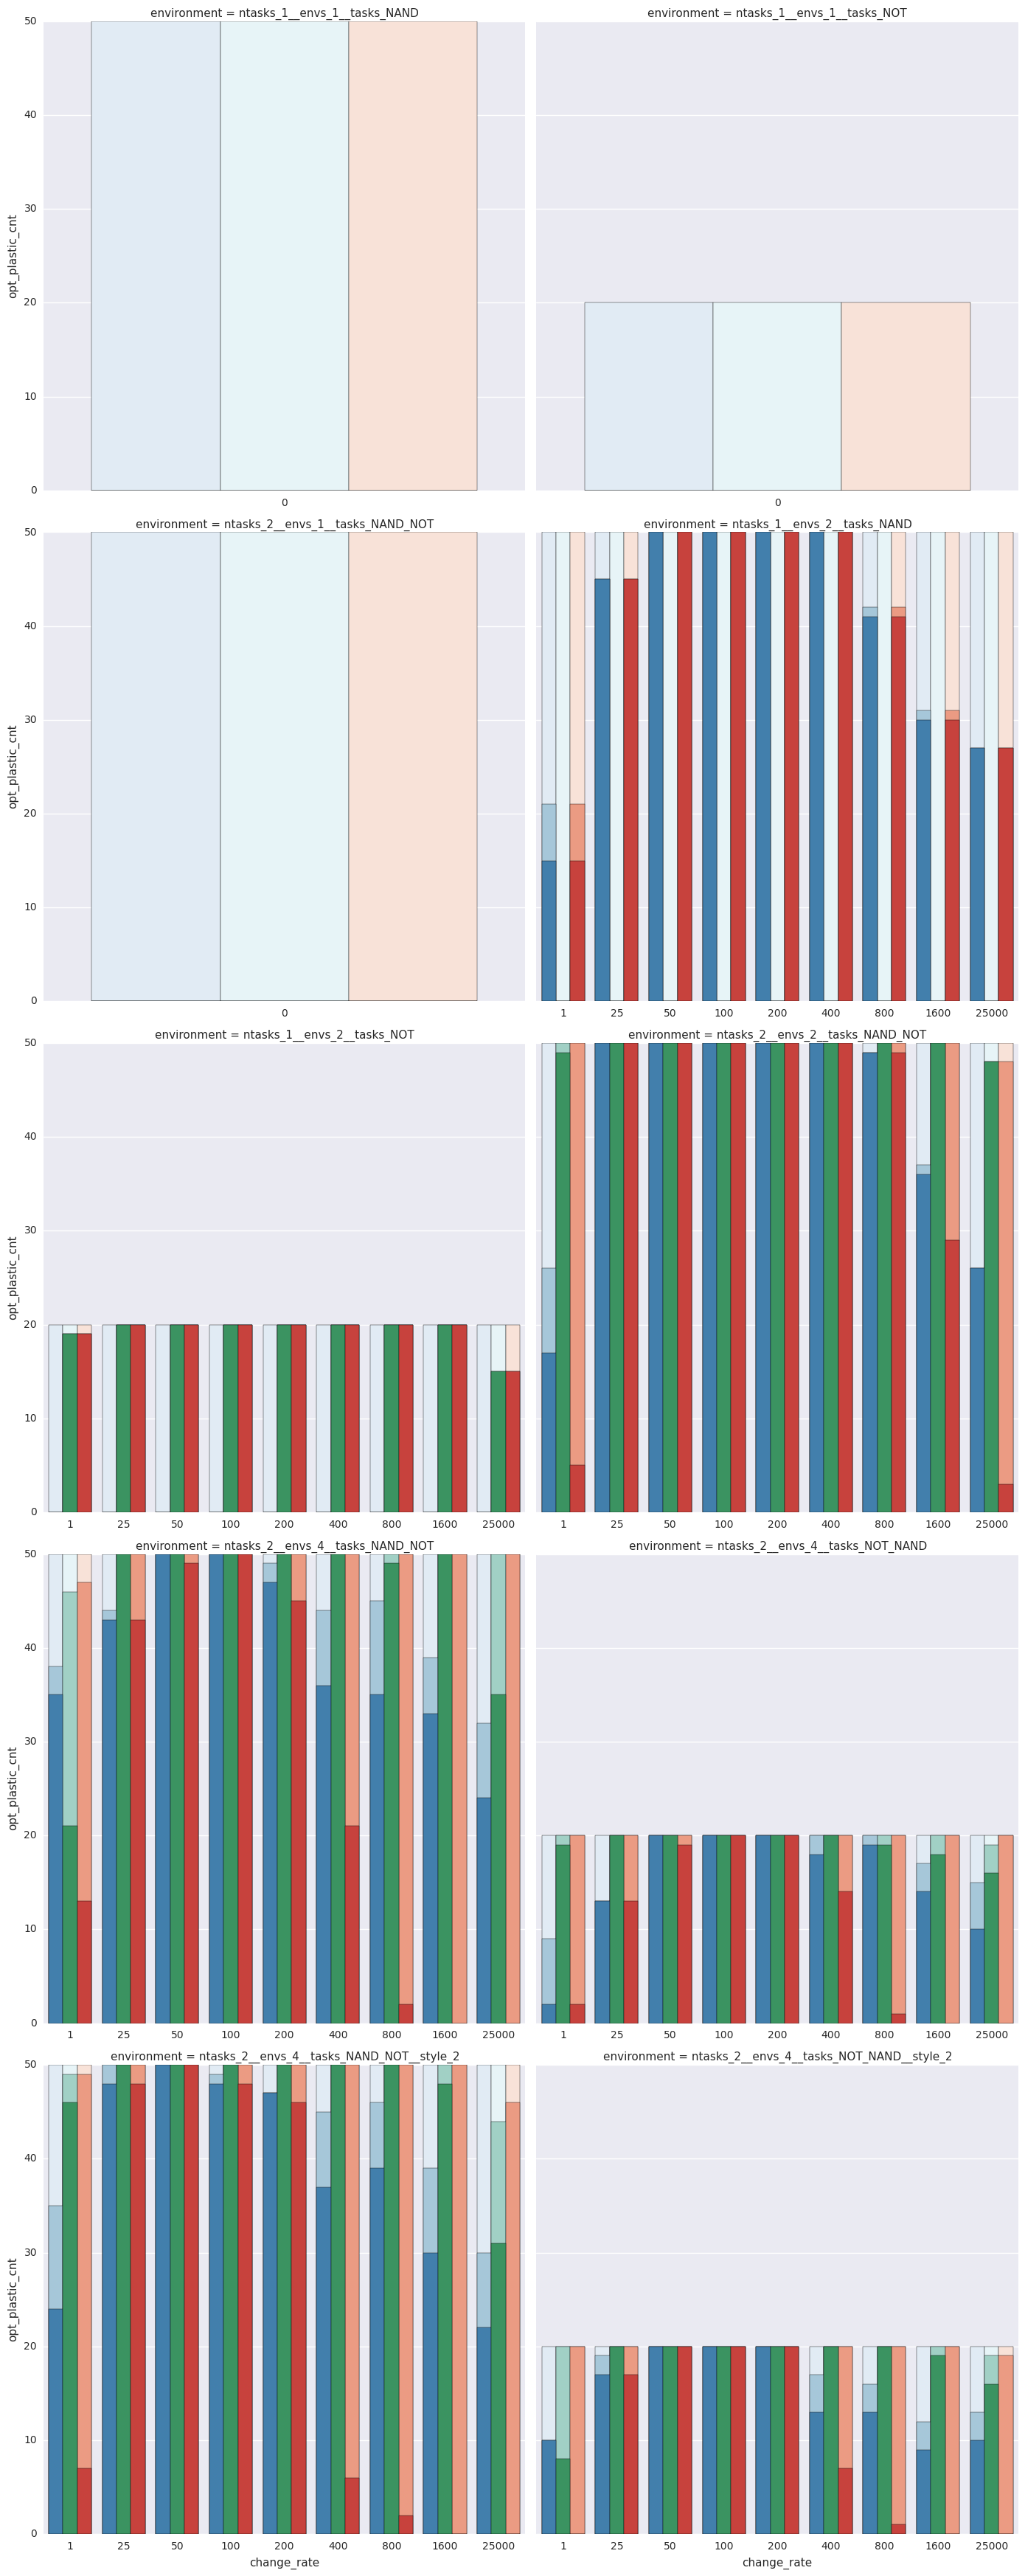

In [59]:
##############################
# Visualize: optimal plastic/plastic/total
##############################
g = sns.FacetGrid(data = df_trans, col="environment", col_order=env_order, col_wrap=2, sharex=False,  size = 7)
g = (g.map(sns.barplot, "change_rate", "total_reps", "trait", ci=None, hue_order=["nand","not","all"], palette={"nand":light[0], "not":light[1], "all":light[2]})
         .set(ylim=(0, 50)))
g = (g.map(sns.barplot, "change_rate", "con_cnt", "trait", ci=None, hue_order=["nand","not","all"], palette={"nand":mid[0], "not":mid[1], "all":mid[2]})
         .set(ylim=(0, 50)))
g = (g.map(sns.barplot, "change_rate", "opt_plastic_cnt", "trait", ci=None, hue_order=["nand","not","all"], palette={"nand":dark[0], "not":dark[1], "all":dark[2]})
         .set(ylim=(0, 50)))

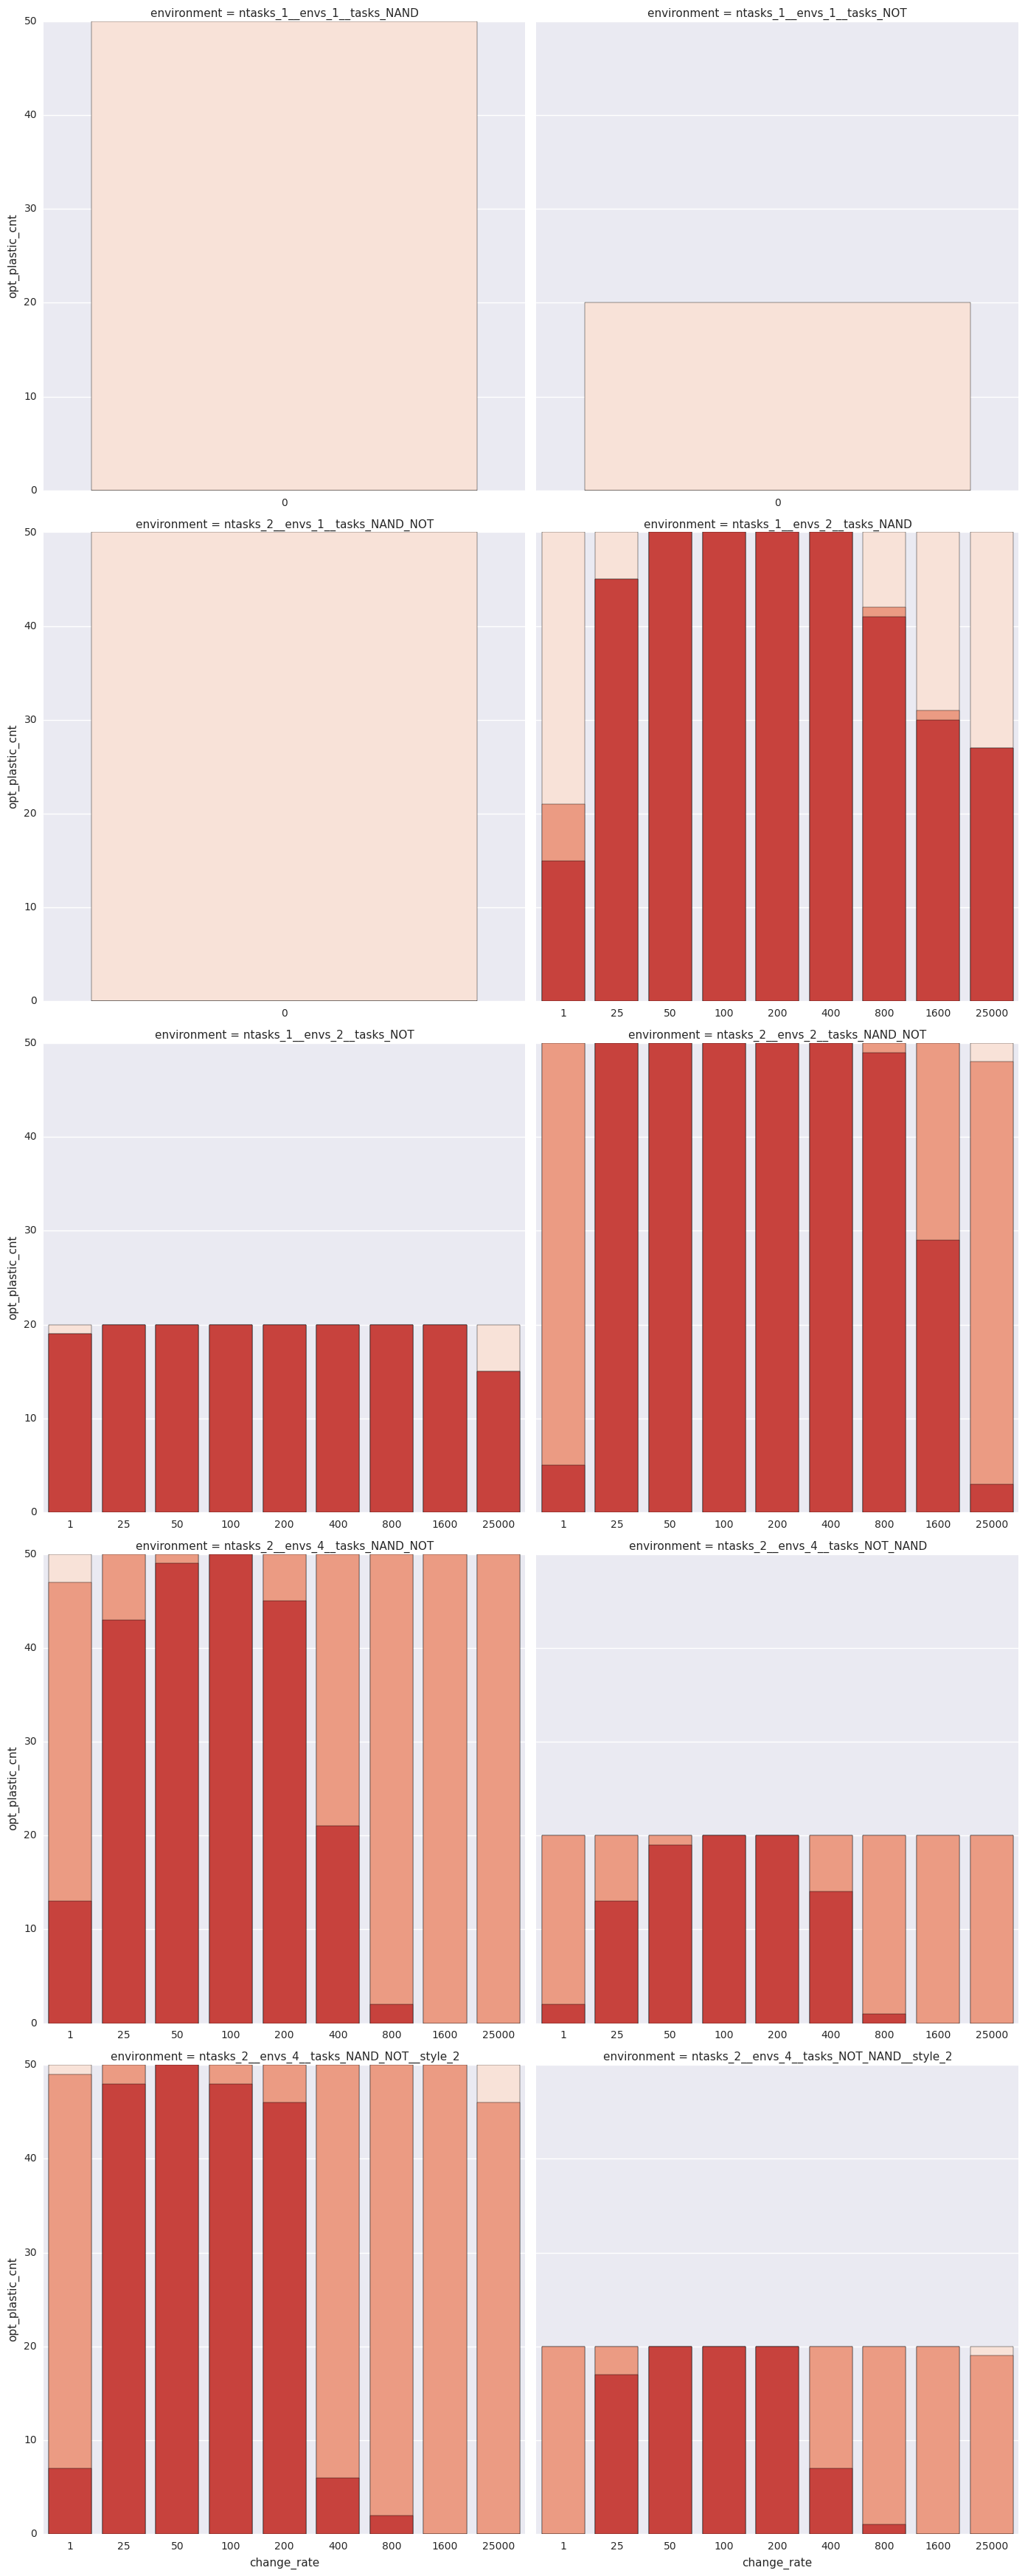

In [60]:
##############################
# Visualize: optimal plastic/plastic/total (just nand + not combined)
##############################
g = sns.FacetGrid(data = df_trans, col="environment", col_order=env_order, col_wrap=2, sharex=False,  size = 7)
g = (g.map(sns.barplot, "change_rate", "total_reps", "trait", ci=None, hue_order=["all"], palette={"all":light[2]})
         .set(ylim=(0, 50)))
g = (g.map(sns.barplot, "change_rate", "con_cnt", "trait", ci=None, hue_order=["all"], palette={"all":mid[2]})
         .set(ylim=(0, 50)))
g = (g.map(sns.barplot, "change_rate", "opt_plastic_cnt", "trait", ci=None, hue_order=["all"], palette={"all":dark[2]})
         .set(ylim=(0, 50)))

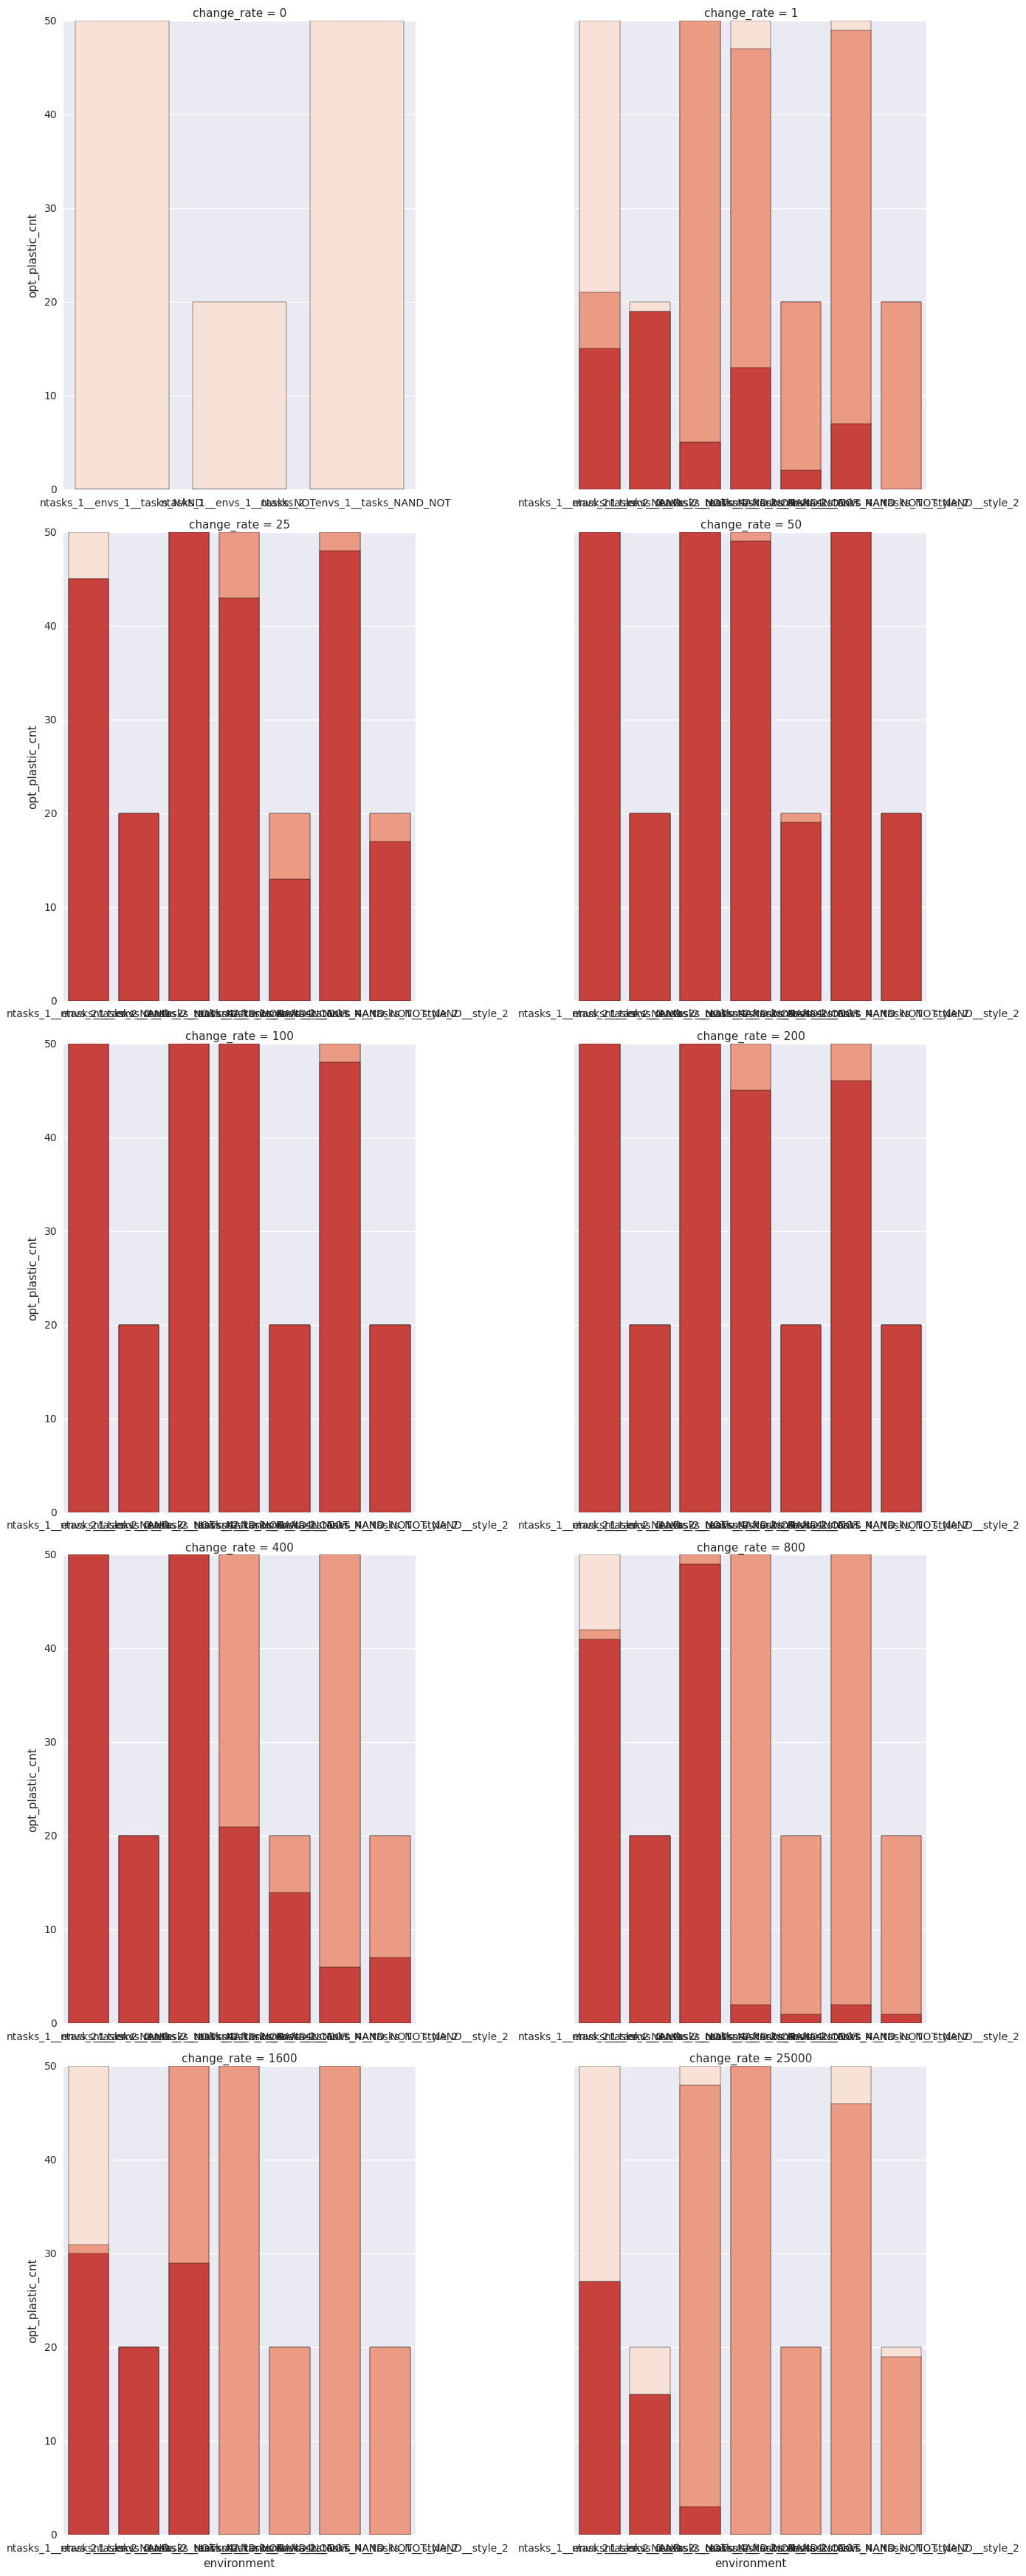

In [64]:
##############################
# Visualize: optimal plastic/plastic/total (just nand + not combined)
##############################
g = sns.FacetGrid(data = df_trans, col="change_rate", col_wrap=2, sharex=False,  size = 7)
g = (g.map(sns.barplot, "environment", "total_reps", "trait", ci=None, hue_order=["all"], palette={"all":light[2]})
         .set(ylim=(0, 50)))
g = (g.map(sns.barplot, "environment", "con_cnt", "trait", ci=None, hue_order=["all"], palette={"all":mid[2]})
         .set(ylim=(0, 50)))
g = (g.map(sns.barplot, "environment", "opt_plastic_cnt", "trait", ci=None, hue_order=["all"], palette={"all":dark[2]})
         .set(ylim=(0, 50)))